Data preparation 

In [161]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, roc_curve

from keras import backend as K
np.random.seed(2002)

In [147]:
#Loading the data 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [148]:
#splitting the labels from the train data

x_train = train.drop(columns=['label']).values
y_train = train['label'].values

x_test = test.values

In [149]:
x_train.shape

(42000, 784)

In [150]:
train.isna().sum().sum()

0

In [151]:
unique_classes = np.unique(y_train)
num_classes = len(unique_classes)
print(num_classes)

10


In [152]:
#Reshaping data to 28x28 pixel image
print("Original x_train shape:", x_train.shape)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print("Reshaped x_train shape:", x_train.shape)

#normalising pixel values
X_train = x_train.astype('float32') / 255.0
X_test = x_test.astype('float32') / 255.0



Original x_train shape: (42000, 784)
Reshaped x_train shape: (42000, 28, 28, 1)


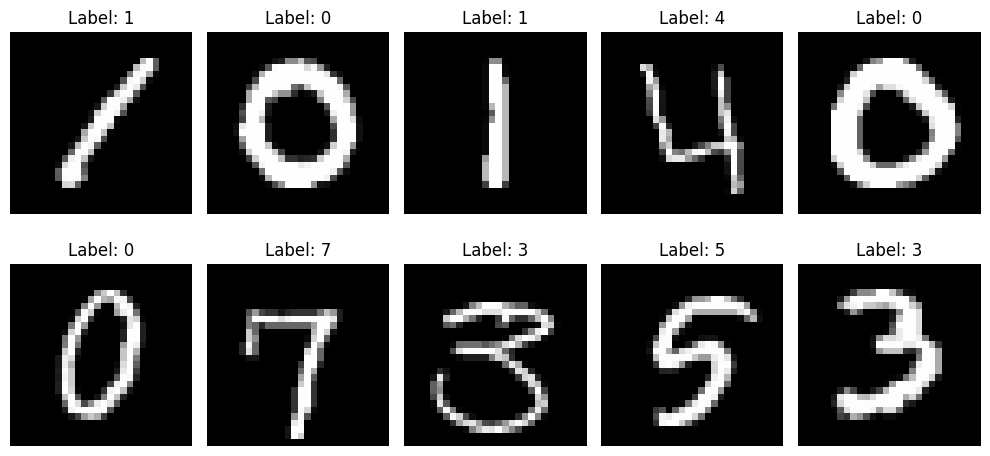

In [153]:
def display_images(images, labels, num=10):
    plt.figure(figsize=(10, 5))
    for i in range(num):
        plt.subplot(2, 5, i + 1)  # Create a grid of 2 rows and 5 columns
        plt.imshow(x_train[i], cmap='gray')  # Reshape for display
        plt.title(f'Label: {y_train[i]}')
        plt.grid(False)
        plt.axis('off')  # Hide axis
    plt.tight_layout()
    plt.show()

# Display the first 10 images and their labels
display_images(x_train, y_train, num=10)

In [154]:
#converting labels to categorical format
y_train = to_categorical(y_train, num_classes= 10)

In [164]:
#constructing CNN model
K.clear_session()
cnn_model = models.Sequential()


#adding layers with poooling
cnn_model.add(layers.Conv2D(32, (5, 5), activation='relu', padding = 'Same', input_shape=(28, 28, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'Same'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'Same',))

#flattening and adding dense layers
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))



In [165]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,674 (1006.54 KB)

 Trainable params: 257,674 (1006.54 KB)

 Non-trainable params: 0 (0.00 B)

In [166]:
cnn_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2, steps_per_epoch= x_train.shape[0] // 32)

Epoch 1/10
1312/1312 - 9s - 7ms/step - accuracy: 0.9391 - loss: 0.2677 - val_accuracy: 0.9761 - val_loss: 0.0773
Epoch 2/10
1312/1312 - 7s - 5ms/step - accuracy: 0.9795 - loss: 0.0667 - val_accuracy: 0.9824 - val_loss: 0.0590
Epoch 3/10
1312/1312 - 7s - 5ms/step - accuracy: 0.9821 - loss: 0.0557 - val_accuracy: 0.9838 - val_loss: 0.0559
Epoch 4/10
1312/1312 - 7s - 5ms/step - accuracy: 0.9851 - loss: 0.0441 - val_accuracy: 0.9736 - val_loss: 0.1000
Epoch 5/10
1312/1312 - 17s - 13ms/step - accuracy: 0.9855 - loss: 0.0429 - val_accuracy: 0.9808 - val_loss: 0.0706
Epoch 6/10
1312/1312 - 18s - 13ms/step - accuracy: 0.9869 - loss: 0.0385 - val_accuracy: 0.9814 - val_loss: 0.0703
Epoch 7/10
1312/1312 - 17s - 13ms/step - accuracy: 0.9892 - loss: 0.0331 - val_accuracy: 0.9826 - val_loss: 0.0706
Epoch 8/10
1312/1312 - 18s - 14ms/step - accuracy: 0.9886 - loss: 0.0349 - val_accuracy: 0.9823 - val_loss: 0.0713
Epoch 9/10
1312/1312 - 18s - 14ms/step - accuracy: 0.9904 - loss: 0.0292 - val_accuracy:

In [167]:
cnn_model.predict(x_train[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[9.2836507e-18, 1.0000000e+00, 3.3092293e-17, 5.0388037e-22,
        1.3325897e-16, 7.3287292e-23, 5.8494169e-23, 2.0110665e-16,
        2.2453173e-20, 1.3368757e-14]], dtype=float32)

In [168]:
#extracting output from cnn 
feature_extract = models.Model(inputs = cnn_model.input, outputs = cnn_model.output)

x_train_feat = feature_extract.predict(x_train)
x_test_feat =  feature_extract.predict(x_test)

ValueError: The layer sequential has never been called and thus has no defined input.